In [2]:
import pandas as pd

df = pd.read_csv("D:\Greaduation Project\data\kaggle\Stroke Prediction Dataset.csv")


Load Data

In [3]:
df.head()

,Sex,BMI,Smoking,AlcoholDrinking,HeartDisease,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Stroke
0,Female,16.60,Yes,No,No,3,30,No,Yes,55-59,White,Yes,Very good,5,Yes,No,No
1,Female,20.34,No,No,No,0,0,No,No,80 or older,White,Yes,Very good,7,No,No,Yes
2,Male,26.58,Yes,No,No,20,30,No,Yes,65-69,White,Yes,Fair,8,Yes,No,No
3,Female,24.21,No,No,No,0,0,No,No,75-79,White,No,Good,6,No,No,No
4,Female,23.71,No,No,No,28,0,Yes,No,40-44,White,Yes,Very good,8,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   HeartDisease      319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Diabetic          319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  int64  
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  Stroke            31

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


In [5]:
df.isna().sum()

Sex                 0
BMI                 0
Smoking             0
AlcoholDrinking     0
HeartDisease        0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Diabetic            0
AgeCategory         0
Race                0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
Stroke              0
dtype: int64

Missing Values

In [7]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

outliers

In [8]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [9]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, len(outliers))

BMI 8637
PhysicalHealth 47131
MentalHealth 39708
SleepTime 4542


In [12]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df[(df[col] < lower) | (df[col] > upper)]

,Sex,BMI,Smoking,AlcoholDrinking,HeartDisease,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,Stroke
5,Female,28.870,Yes,No,Yes,6,0,Yes,No,75-79,Black,No,Fair,12,No,No,No
10,Male,34.300,Yes,No,Yes,30,0,Yes,Yes,60-64,White,No,Poor,15,Yes,No,No
50,Female,26.610,No,No,No,0,0,No,No,65-69,White,Yes,Good,12,Yes,No,No
206,Female,35.110,Yes,No,No,20,0,No,No,75-79,Black,Yes,Fair,12,No,No,No
235,Male,43.305,No,No,No,0,0,Yes,Yes,45-49,Black,Yes,Fair,2,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319373,Female,24.030,No,No,No,12,7,Yes,Yes,50-54,Hispanic,No,Fair,2,No,No,No
319394,Male,33.130,No,No,No,0,0,No,No,55-59,Hispanic,Yes,Fair,2,No,Yes,No
319408,Female,38.860,No,No,No,30,30,Yes,No,45-49,Hispanic,No,Fair,1,No,No,No
319702,Male,24.410,No,Yes,No,0,0,No,No,35-39,Hispanic,Yes,Good,12,No,No,No


In [ ]:
# bmi capping
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["BMI"] = df["BMI"].clip(lower, upper)

In [14]:
df["SleepTime"].describe()

count    298853.000000
mean          7.081692
std           1.472150
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [ ]:
#Target Distribution
df["Stroke"].value_counts()
df["Stroke"].value_counts(normalize=True)

Stroke
No     0.959642
Yes    0.040358
Name: proportion, dtype: float64

Smoking vs Stroke

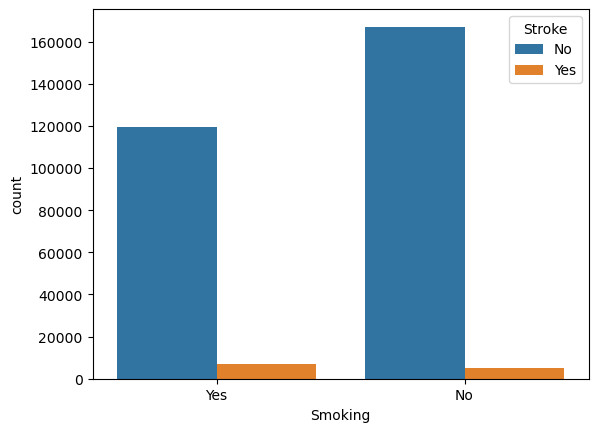

Stroke,No,Yes
Smoking,,
No,0.969538,0.030462
Yes,0.946161,0.053839


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Smoking", hue="Stroke", data=df)
plt.show()

pd.crosstab(df["Smoking"], df["Stroke"], normalize="index")

HeartDisease vs Stroke

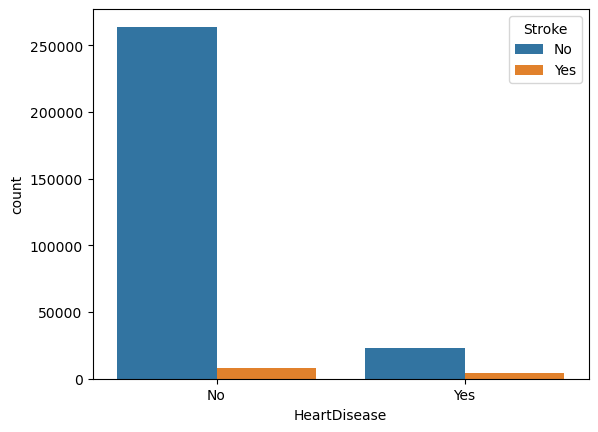

Stroke,No,Yes
HeartDisease,,
No,0.971750,0.028250
Yes,0.838773,0.161227


In [17]:
sns.countplot(x="HeartDisease", hue="Stroke", data=df)
plt.show()

pd.crosstab(df["HeartDisease"], df["Stroke"], normalize="index")

Diabetic vs Stroke

In [18]:
pd.crosstab(df["Diabetic"], df["Stroke"], normalize="index")

Stroke,No,Yes
Diabetic,,
No,0.968301,0.031699
"No, borderline diabetes",0.947734,0.052266
Yes,0.907669,0.092331
Yes (during pregnancy),0.971831,0.028169


AgeCategory vs Stroke

In [19]:
pd.crosstab(df["AgeCategory"], df["Stroke"], normalize="index")

Stroke,No,Yes
AgeCategory,,
18-24,0.996949,0.003051
25-29,0.994482,0.005518
30-34,0.992700,0.007300
35-39,0.990102,0.009898
40-44,0.985202,0.014798
45-49,0.979101,0.020899
50-54,0.970938,0.029062
55-59,0.959701,0.040299
60-64,0.951843,0.048157


GenHealth vs Stroke

In [20]:
pd.crosstab(df["GenHealth"], df["Stroke"], normalize="index")

Stroke,No,Yes
GenHealth,,
Excellent,0.988266,0.011734
Fair,0.904811,0.095189
Good,0.957322,0.042678
Poor,0.829080,0.170920
Very good,0.978026,0.021974


In [22]:
# age numeric
age_map = {
    "18-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-64": 9,
    "65-69": 10,
    "70-74": 11,
    "75-79": 12,
    "80 or older": 13
}
df["AgeNum"] = df["AgeCategory"].map(age_map)

# diabetic flag
df["is_diabetic"] = df["Diabetic"].isin(
    ["Yes", "No, borderline diabetes"]
).astype(int)

# health flag
df["bad_health"] = df["GenHealth"].isin(
    ["Poor", "Fair"]
).astype(int)

# risk score
df["risk_score"] = (
    df["HeartDisease"].map({"Yes":1,"No":0}) +
    df["is_diabetic"] +
    df["bad_health"]
)

In [23]:
df.columns

Index(['Sex', 'BMI', 'Smoking', 'AlcoholDrinking', 'HeartDisease',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'Stroke', 'AgeNum', 'is_diabetic',
       'bad_health', 'risk_score'],
      dtype='object')

In [24]:
df = df.drop("AgeCategory", axis=1)
df = df.drop("Diabetic", axis=1)
df = df.drop("GenHealth", axis=1)

Encoding

In [25]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
df.shape
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeNum,is_diabetic,bad_health,risk_score,Sex_Male,Smoking_Yes,...,DiffWalking_Yes,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,Stroke_Yes
0,16.60,3,30,5,8,1,0,1,False,True,...,False,False,False,False,False,True,True,True,False,False
1,20.34,0,0,7,13,0,0,0,False,False,...,False,False,False,False,False,True,True,False,False,True
2,26.58,20,30,8,10,1,1,2,True,True,...,False,False,False,False,False,True,True,True,False,False
3,24.21,0,0,6,12,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,23.71,28,0,8,5,0,0,0,False,False,...,True,False,False,False,False,True,True,False,False,False


Split

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop("Stroke_Yes", axis=1)
y = df["Stroke_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5017 4498]
 [ 264  221]]
              precision    recall  f1-score   support

           0       0.95      0.53      0.68      9515
           1       0.05      0.46      0.08       485

    accuracy                           0.52     10000
   macro avg       0.50      0.49      0.38     10000
weighted avg       0.91      0.52      0.65     10000



In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56955   404]
 [ 2390    22]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98     57359
        True       0.05      0.01      0.02      2412

    accuracy                           0.95     59771
   macro avg       0.51      0.50      0.50     59771
weighted avg       0.92      0.95      0.94     59771



SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(y_train_sm.value_counts())

Stroke_Yes
False    229433
True     229433
Name: count, dtype: int64


In [30]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53762  3597]
 [ 1971   441]]
              precision    recall  f1-score   support

       False       0.96      0.94      0.95     57359
        True       0.11      0.18      0.14      2412

    accuracy                           0.91     59771
   macro avg       0.54      0.56      0.54     59771
weighted avg       0.93      0.91      0.92     59771



threshold

In [31]:
y_probs = rf.predict_proba(X_test)[:,1]

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("\nThreshold =", t)
    y_pred_t = (y_probs >= t).astype(int)
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.1
[[41077 16282]
 [  858  1554]]
              precision    recall  f1-score   support

       False       0.98      0.72      0.83     57359
        True       0.09      0.64      0.15      2412

    accuracy                           0.71     59771
   macro avg       0.53      0.68      0.49     59771
weighted avg       0.94      0.71      0.80     59771


Threshold = 0.2
[[47001 10358]
 [ 1245  1167]]
              precision    recall  f1-score   support

       False       0.97      0.82      0.89     57359
        True       0.10      0.48      0.17      2412

    accuracy                           0.81     59771
   macro avg       0.54      0.65      0.53     59771
weighted avg       0.94      0.81      0.86     59771


Threshold = 0.3
[[50330  7029]
 [ 1579   833]]
              precision    recall  f1-score   support

       False       0.97      0.88      0.92     57359
        True       0.11      0.35      0.16      2412

    accuracy                          

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [34]:
y_pred = xgb.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47807  9552]
 [ 1320  1092]]
              precision    recall  f1-score   support

       False       0.97      0.83      0.90     57359
        True       0.10      0.45      0.17      2412

    accuracy                           0.82     59771
   macro avg       0.54      0.64      0.53     59771
weighted avg       0.94      0.82      0.87     59771



In [35]:
y_probs = xgb.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, classification_report

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("\nThreshold =", t)
    y_pred_t = (y_probs >= t).astype(int)
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.1
[[23326 34033]
 [  265  2147]]
              precision    recall  f1-score   support

       False       0.99      0.41      0.58     57359
        True       0.06      0.89      0.11      2412

    accuracy                           0.43     59771
   macro avg       0.52      0.65      0.34     59771
weighted avg       0.95      0.43      0.56     59771


Threshold = 0.2
[[32620 24739]
 [  526  1886]]
              precision    recall  f1-score   support

       False       0.98      0.57      0.72     57359
        True       0.07      0.78      0.13      2412

    accuracy                           0.58     59771
   macro avg       0.53      0.68      0.43     59771
weighted avg       0.95      0.58      0.70     59771


Threshold = 0.3
[[38759 18600]
 [  784  1628]]
              precision    recall  f1-score   support

       False       0.98      0.68      0.80     57359
        True       0.08      0.67      0.14      2412

    accuracy                          

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1],
    "colsample_bytree": [0.7, 0.8, 1],
    "gamma": [0, 1, 2],
    "min_child_weight": [1, 3, 5]
}

search = RandomizedSearchCV(
    xgb,
    param_grid,
    n_iter=10,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_sm, y_train_sm)

best_xgb = search.best_estimator_
_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [38]:
y_probs = best_xgb.predict_proba(X_test)[:,1]

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("\nThreshold =", t)

    y_pred_t = (y_probs >= t).astype(int)

    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.1
[[24412 32947]
 [  305  2107]]
              precision    recall  f1-score   support

       False       0.99      0.43      0.59     57359
        True       0.06      0.87      0.11      2412

    accuracy                           0.44     59771
   macro avg       0.52      0.65      0.35     59771
weighted avg       0.95      0.44      0.58     59771


Threshold = 0.2
[[33460 23899]
 [  577  1835]]
              precision    recall  f1-score   support

       False       0.98      0.58      0.73     57359
        True       0.07      0.76      0.13      2412

    accuracy                           0.59     59771
   macro avg       0.53      0.67      0.43     59771
weighted avg       0.95      0.59      0.71     59771


Threshold = 0.3
[[39525 17834]
 [  844  1568]]
              precision    recall  f1-score   support

       False       0.98      0.69      0.81     57359
        True       0.08      0.65      0.14      2412

    accuracy                          

In [41]:
print(search.best_params_)

{'subsample': 0.7, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


EDA
